In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import bgp_qnm_fits as bgp
import corner

# Constants
ID = '0001'
DATA_TYPE = 'news'
SPHERICAL_MODES = [(2, 2)]
THRESHOLD = 0.9
N_MAX = 6
t0 = 30
T = 100
N_DRAWS = 10000
INCLUDE_CHIF = True
INCLUDE_MF = True
t0_vals = np.arange(0, 40.1, 2)

sim = bgp.SXS_CCE(ID, type=DATA_TYPE, lev="Lev5", radius="R2")
tuned_param_dict_GP = bgp.get_tuned_param_dict("GP", data_type=DATA_TYPE)[ID]
Mf, chif = sim.Mf, sim.chif_mag

/data/vault/rvnd2/Code/qnmfits/qnmfits/Waveforms/Base.py:116: RuntimeWarning: divide by zero encountered in divide
  chidot = self.Jdot/(self.Moft**2).reshape(len(self.Moft),1)


In [3]:
candidate_modes_1 = [(2, 2, n, 1) for n in range(1)]

full_fit_1 = bgp.BGP_fit(
    sim.times,
    sim.h,
    candidate_modes_1 + [(3, 2, 0, 1)],
    Mf,
    chif,
    tuned_param_dict_GP,
    bgp.kernel_GP,
    t0=t0,
    use_nonlinear_params=False,
    num_samples=N_DRAWS,
    t0_method="geq",
    T=T,
    spherical_modes=SPHERICAL_MODES,
    include_chif=INCLUDE_CHIF,
    include_Mf=INCLUDE_MF,
    strain_parameters=False,
    data_type=DATA_TYPE
)
model_1 = full_fit_1.fit["model_array_linear"]
times_1 = full_fit_1.fit["analysis_times"]
data_1 = full_fit_1.fit["data_array_masked"]

residual_1 = data_1 - model_1
r_squared_1 = np.einsum("st, st -> ", np.conj(residual_1), residual_1).real


In [4]:
candidate_modes_2 = [(2, 2, n, 1) for n in range(2)]

full_fit_2 = bgp.BGP_fit(
    sim.times,
    sim.h,
    candidate_modes_2 + [(3, 2, 0, 1)],
    Mf,
    chif,
    tuned_param_dict_GP,
    bgp.kernel_GP,
    t0=t0,
    use_nonlinear_params=False,
    num_samples=N_DRAWS,
    t0_method="geq",
    T=T,
    spherical_modes=SPHERICAL_MODES,
    include_chif=INCLUDE_CHIF,
    include_Mf=INCLUDE_MF,
    strain_parameters=False,
    data_type=DATA_TYPE
)
model_2 = full_fit_2.fit["model_array_linear"]
times_2 = full_fit_2.fit["analysis_times"]
data_2 = full_fit_2.fit["data_array_masked"]

residual_2 = data_2 - model_2
r_squared_2 = np.einsum("st, st -> ", np.conj(residual_2), residual_2).real

In [5]:
candidate_modes_3 = [(2, 2, n, 1) for n in range(3)]

full_fit_3 = bgp.BGP_fit(
    sim.times,
    sim.h,
    candidate_modes_3 + [(3, 2, 0, 1)],
    Mf,
    chif,
    tuned_param_dict_GP,
    bgp.kernel_GP,
    t0=t0,
    use_nonlinear_params=False,
    num_samples=N_DRAWS,
    t0_method="geq",
    T=T,
    spherical_modes=SPHERICAL_MODES,
    include_chif=INCLUDE_CHIF,
    include_Mf=INCLUDE_MF,
    strain_parameters=False,
    data_type=DATA_TYPE
)
model_3 = full_fit_3.fit["model_array_linear"]
times_3 = full_fit_3.fit["analysis_times"]
data_3 = full_fit_3.fit["data_array_masked"]

residual_3 = data_3 - model_3
r_squared_3 = np.einsum("st, st -> ", np.conj(residual_3), residual_3).real

In [6]:
candidate_modes_4 = [(2, 2, n, 1) for n in range(4)]

full_fit_4 = bgp.BGP_fit(
    sim.times,
    sim.h,
    candidate_modes_4 + [(3, 2, 0, 1)],
    Mf,
    chif,
    tuned_param_dict_GP,
    bgp.kernel_GP,
    t0=t0,
    use_nonlinear_params=False,
    num_samples=N_DRAWS,
    t0_method="geq",
    T=T,
    spherical_modes=SPHERICAL_MODES,
    include_chif=INCLUDE_CHIF,
    include_Mf=INCLUDE_MF,
    strain_parameters=False,
    data_type=DATA_TYPE
)
model_4 = full_fit_4.fit["model_array_linear"]
times_4 = full_fit_4.fit["analysis_times"]
data_4 = full_fit_4.fit["data_array_masked"]

residual_4 = data_4 - model_4
r_squared_4 = np.einsum("st, st -> ", np.conj(residual_4), residual_4).real

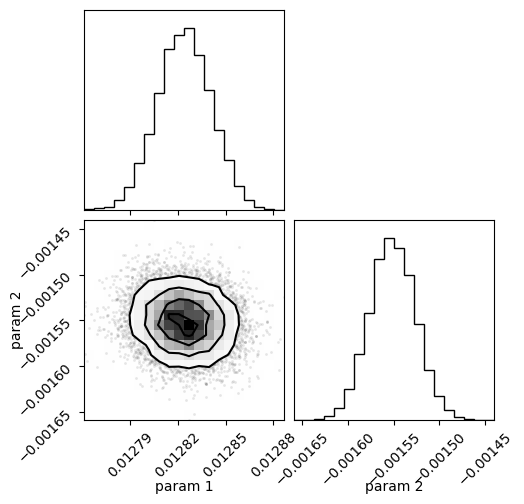

In [ ]:
samples_1 = np.array(full_fit_1.fit["samples"])[:, [1, 2]]
figure = corner.corner(samples_1, labels=["param 1", "param 2"])

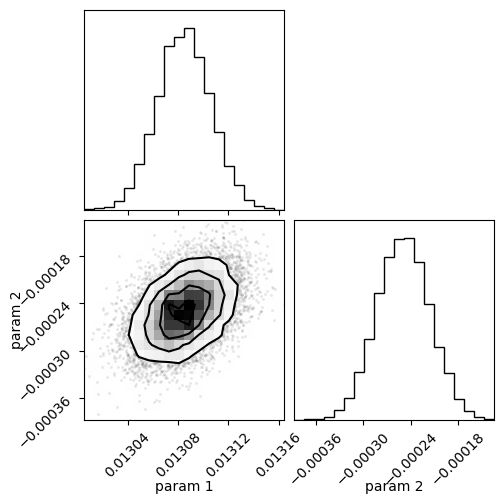

In [17]:
samples_2 = np.array(full_fit_2.fit["samples"])[:, [1, 2]]
figure = corner.corner(samples_2, labels=["param 1", "param 2"])

In [23]:
samples_1 = np.array(full_fit_1.fit["samples"])
widths_1 = np.percentile(samples_1, 95, axis=0) - np.percentile(samples_1, 5, axis=0)

samples_2 = np.array(full_fit_2.fit["samples"])
widths_2 = np.percentile(samples_2, 95, axis=0) - np.percentile(samples_2, 5, axis=0)

samples_3 = np.array(full_fit_3.fit["samples"])
widths_3 = np.percentile(samples_3, 95, axis=0) - np.percentile(samples_3, 5, axis=0)

samples_4 = np.array(full_fit_4.fit["samples"])
widths_4 = np.percentile(samples_4, 95, axis=0) - np.percentile(samples_4, 5, axis=0)

print(widths_1)
print(widths_2)
print(widths_3)
print(widths_4)

[5.52356154e-05 5.58360599e-05 8.27732325e-05 8.31070739e-05
 2.21087576e-04 1.68864900e-04]
[7.06095472e-05 7.10403744e-05 1.11353009e-04 1.10975583e-04
 8.56273941e-05 8.47832273e-05 2.62030689e-04 1.99888803e-04]
[8.01197373e-05 7.87399658e-05 3.30805786e-04 3.34110828e-04
 2.25492869e-04 2.19699320e-04 8.73523123e-05 8.81753782e-05
 2.85056945e-04 2.16392577e-04]
[8.73852473e-05 8.61658887e-05 6.53832532e-04 6.52648514e-04
 1.05636607e-03 1.06580754e-03 4.71739538e-04 4.64657791e-04
 8.86877344e-05 9.24591396e-05 3.13296915e-04 2.39779802e-04]


In [8]:
print(candidate_modes_1)
print(candidate_modes_2)
print(candidate_modes_3)
print(candidate_modes_4)

[(2, 2, 0, 1)]
[(2, 2, 0, 1), (2, 2, 1, 1)]
[(2, 2, 0, 1), (2, 2, 1, 1), (2, 2, 2, 1)]
[(2, 2, 0, 1), (2, 2, 1, 1), (2, 2, 2, 1), (2, 2, 3, 1)]


In [9]:
print(r_squared_1)
print(r_squared_2)
print(r_squared_3)
print(r_squared_4)

1.413775022989833e-05
3.1366308061308645e-08
8.601144158680178e-09
1.0037471685459188e-09


/tmp/ipykernel_1670971/2871648833.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend()


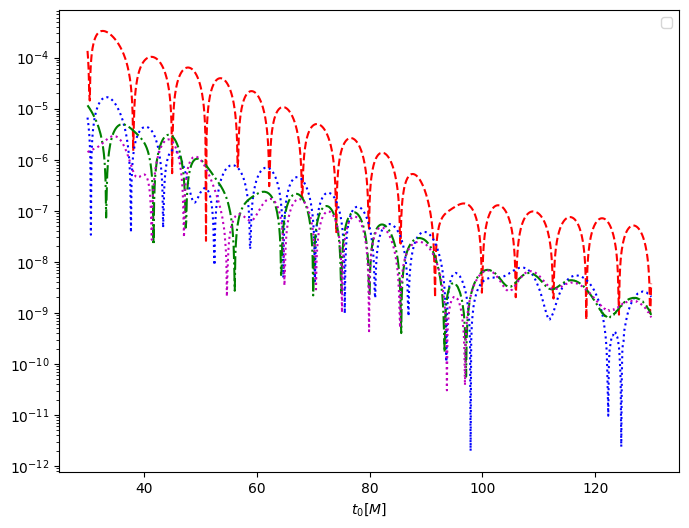

In [10]:
fig, ax1 = plt.subplots(figsize=(8, 6))

#ax1.plot(times, np.abs(data[0].real), color="k", linestyle="-")
ax1.plot(times_1, np.abs(residual_1[0].real), color="r", linestyle="--")
ax1.plot(times_2, np.abs(residual_2[0].real), color="b", linestyle=":")
ax1.plot(times_3, np.abs(residual_3[0].real), color="g", linestyle="-.")
ax1.plot(times_4, np.abs(residual_4[0].real), color="m", linestyle=":")

ax1.set_xlabel(r"$t_0 [M]$")
ax1.set_yscale('log')
ax1.legend()